<a href="https://colab.research.google.com/github/piyu18/Getting-Things-Done-with-Pytorch/blob/master/text_classification_spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv('/content/drive/MyDrive/Spam_Ham/sms.tsv',sep='\t',names=['category','text'])

In [35]:
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df['category'] = df['category'].map({'ham':1,'spam':0})

In [37]:
df.head()

,category,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df = df[['category', 'text']]

In [39]:
X = df['text'].values

In [40]:
y = df['category'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train.shape

(4457, 9609)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



In [48]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [50]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_data=(X_test,y_test),
    verbose=1,
    callbacks=[early_stop]
    )

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 30), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


140/140 [==============================] - 2s 7ms/step - loss: 0.4581 - accuracy: 0.8578 - val_loss: 0.2016 - val_accuracy: 0.9417
Epoch 2/200
140/140 [==============================] - 1s 6ms/step - loss: 0.1517 - accuracy: 0.9529 - val_loss: 0.0713 - val_accuracy: 0.9883
Epoch 3/200
140/140 [==============================] - 1s 6ms/step - loss: 0.0731 - accuracy: 0.9841 - val_loss: 0.0618 - val_accuracy: 0.9883
Epoch 4/200
140/140 [==============================] - 1s 6ms/step - loss: 0.0395 - accuracy: 0.9917 - val_loss: 0.0690 - val_accuracy: 0.9883
Epoch 5/200
140/140 [==============================] - 1s 6ms/step - loss: 0.0308 - accuracy: 0.9930 - val_loss: 0.0749 - val_accuracy: 0.9874
Epoch 6/200
140/140 [==============================] - 1s 6ms/step - loss: 0.0232 - accuracy: 0.9917 - val_loss: 0.0796 - val_accuracy: 0.9883
Epoch 7/200
140/140 [==============================] - 1s 6ms/step - loss: 0.0192 - accuracy: 0.9946 - val_loss: 0.0854 - val_accuracy: 0.9883
Epoch 8/200

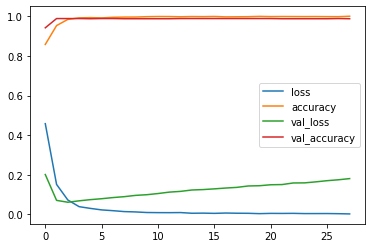

In [52]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

##Model Evaluation

In [53]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       149
           1       0.99      1.00      0.99       966

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [55]:
print(confusion_matrix(y_test,predictions))

[[138  11]
 [  3 963]]


In [61]:
text = ['Just forced myself to eat a pizza. I was so hungry']

In [62]:
test = vectorizer.transform(text)

###Save Model

In [58]:
from tensorflow.keras.models import load_model
model.save('/content/ham_spam.h5')

In [59]:
loaded_model = load_model('/content/ham_spam.h5')

In [63]:
loaded_model.predict(test)

array([[1.]], dtype=float32)